**Import Various Libraries**

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df= pd.read_csv('/content/OnlineNewsPopularity.csv')

In [107]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731,12,219,0.663594,1.0,0.815385,4,2,1,0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731,9,255,0.604743,1.0,0.791946,3,1,1,0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731,9,211,0.575130,1.0,0.663866,3,1,1,0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731,9,531,0.503788,1.0,0.665635,9,0,1,0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    timedelta                      39644 non-null  int64  
 1    n_tokens_title                 39644 non-null  int64  
 2    n_tokens_content               39644 non-null  int64  
 3    n_unique_tokens                39644 non-null  float64
 4    n_non_stop_words               39644 non-null  float64
 5    n_non_stop_unique_tokens       39644 non-null  float64
 6    num_hrefs                      39644 non-null  int64  
 7    num_self_hrefs                 39644 non-null  int64  
 8    num_imgs                       39644 non-null  int64  
 9    num_videos                     39644 non-null  int64  
 10   average_token_length           39644 non-null  float64
 11   num_keywords                   39644 non-null  int64  
 12   data_channel_is_lifestyle      

**Define X & Y variables**

In [109]:
df.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

In [110]:
y= df[' shares']
X= df.drop([' shares'], axis=1)

**Train Test Split**

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=2529, train_size=0.8)

**1. Now lets select Bagging Model (Random Forest)**

In [112]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor(n_estimators=100)

In [113]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [114]:
y_pred=rfr.predict(X_test)

In [115]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [116]:
mean_absolute_error(y_test, y_pred)

3563.0523420355653

**2. Gradient Boosting Model**

In [117]:
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor()

In [118]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [119]:
y_pred= gbr.predict(X_test)

In [120]:
mean_absolute_error(y_test, y_pred)

3155.8892874588632

**OUTLIER TREATMENT**

<Axes: >

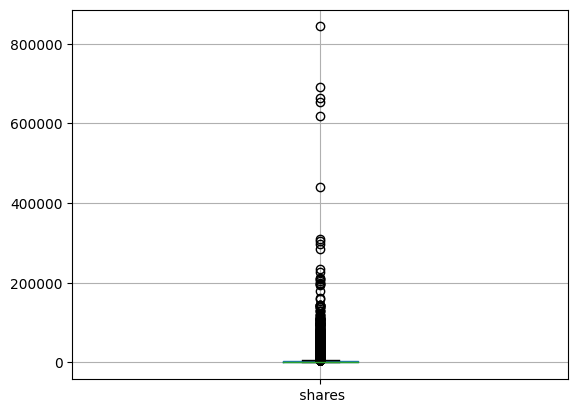

In [121]:
df[[' shares']].boxplot()

In [122]:
p25= df[' shares'].quantile(0.25)
p75= df[' shares'] .quantile(0.75)
iqr= p75-p25

In [123]:
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr

In [124]:
df = df.loc[(df[' shares']< upper_limit) & (df[' shares']> lower_limit), :]


<Axes: >

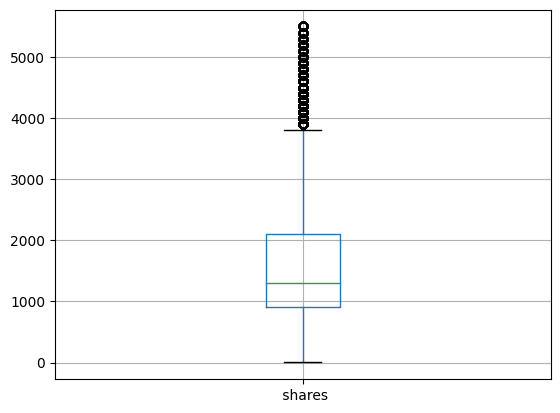

In [125]:
df[[' shares']].boxplot()

**Define X & y again**

In [126]:
y = df[' shares']
X= df.drop([' shares'], axis=1)

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=2529, train_size=0.8)

In [128]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor(n_estimators=100)

In [129]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [130]:
y_pred= rfr.predict(X_test)

In [131]:
mean_absolute_error(y_test, y_pred)

782.3279048568579